In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.5.237:38783")
client

Client Scheduler: tcp://10.32.5.237:38783 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 30 Cores: 60 Memory: 345.00 GB


# Cumulative volume time derivative ($\frac{\partial \mathcal{V}}{\partial t}$)

In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [3]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-sose'), consolidated=True)
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
    Depth     (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    PHrefF    (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
    drC       (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
    drF       (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    dxC       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    dxG       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    dyC       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    dyG       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    hFacC     (Z, YC, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    hFacS     (Z, YG, XC) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    hFacW     (Z, YC, XG) float32 dask.array<chunksize=(42, 320, 2160), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA        (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAs       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAz       (YG, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ETAN      (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    EXFswnet  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    KPPg_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    KPPg_TH   (time, Zl, YC, XC) float32 d

In [4]:
coords = ds.coords.to_dataset().reset_coords()
dsr = ds.reset_coords(drop=True)
dsr

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrE_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFrI_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFxE_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DFyE_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    DRHODR    (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ETAN      (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    EXFswnet  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    KPPg_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    KPPg_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    PHIHYD    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SALT      (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SFLUX     (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIarea    (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIatmFW   (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIatmQnt  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbATC  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbATO  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdHbOCN  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdSbATC  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIdSbOCN  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIempmr   (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIfu      (time, YC, XG) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIfv      (time, YG, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    SIheff    (time, 

## Create xgcm grid

[Xgcm](http://xgcm.readthedocs.io) is a package which helps with the analysis of GCM data.

In [5]:
import xgcm
grid = xgcm.Grid(ds, periodic=('X', 'Y'))
grid

<xgcm.Grid>
Y Axis (periodic):
  * center   YC --> left
  * left     YG --> center
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
T Axis (not periodic):
  * center   time

**Do I do `grid.diff()` on `coords`?**

In [6]:
# define bins
delta_theta = 0.1
theta_bins = np.arange(-2, 20, delta_theta)

In [7]:
# theta distribution
vol = coords.hFacC * coords.rA * coords.drF

theta_dist = histogram(dsr.THETA, bins=[theta_bins],
                       weights=vol, dim=['XC', 'YC', 'Z'])
theta_dist

<xarray.DataArray 'histogram_THETA' (time: 438, THETA_bin: 219)>
dask.array<getitem, shape=(438, 219), dtype=float64, chunksize=(1, 219), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * THETA_bin  (THETA_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 19.65 19.75 19.85

In [8]:
theta_dist.load()

<xarray.DataArray 'histogram_THETA' (time: 438, THETA_bin: 219)>
array([[2.28697794e+14, 2.24331979e+14, 1.94648827e+14, ...,
        8.43850648e+13, 8.16894580e+13, 7.92179546e+13],
       [1.70768239e+14, 2.24179413e+14, 1.96152600e+14, ...,
        8.47525728e+13, 8.36944519e+13, 7.85921872e+13],
       [1.33426275e+14, 2.09737163e+14, 1.87163830e+14, ...,
        8.35988598e+13, 8.37799233e+13, 7.83620130e+13],
       ...,
       [1.79790483e+13, 7.18727577e+14, 2.64123835e+14, ...,
        8.70761809e+13, 8.43641376e+13, 8.52927611e+13],
       [1.70990279e+13, 6.06877605e+14, 2.83538882e+14, ...,
        8.83045356e+13, 8.54370278e+13, 8.38203281e+13],
       [1.59638058e+13, 4.81757510e+14, 3.20764735e+14, ...,
        8.74678032e+13, 8.40712316e+13, 8.31609039e+13]])
Coordinates:
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * THETA_bin  (THETA_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 19.65 19.75 19.85

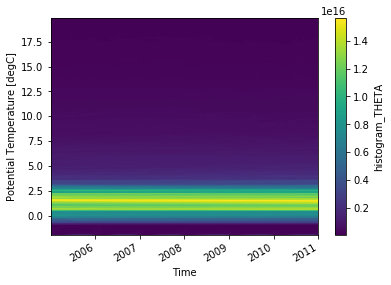

In [9]:
# most of the world's ocean is ~2˚C
# very little variability in temp distribution
theta_dist.plot(x='time')

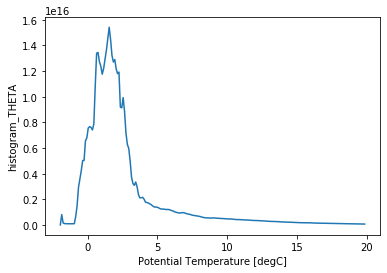

In [10]:
# most of the world's ocean is cold (centered ~2˚C)
theta_dist.mean(dim='time').plot()

(-2, 5)

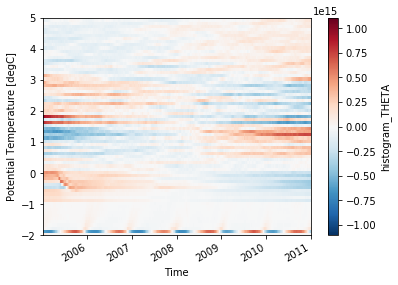

In [11]:
# theta distribution anomaly
(theta_dist - theta_dist.mean(dim='time')).plot(x='time')
plt.ylim([-2, 5])

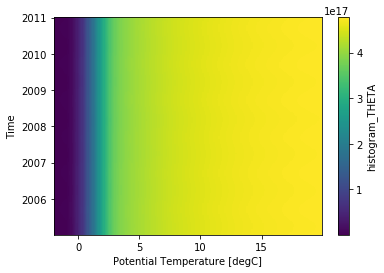

In [12]:
# cumulative volume
V = theta_dist.cumsum(dim='THETA_bin')
V.plot()

(-2, 7)

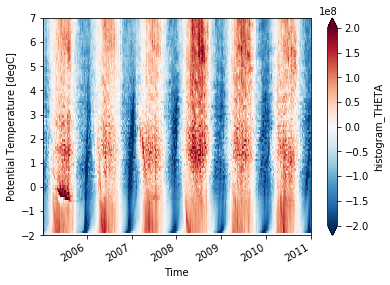

In [15]:
dt = 5*24*60*60
dVdt = V.diff(dim='time') / dt
#dV/dt
dVdt.plot(x='time', vmax=200e6)
plt.ylim(-2, 7)

# $\Psi$

$$
-\int_{\delta R}  (\mathbf{u} \cdot  \hat{\mathbf{n}} ) \mathcal{H}(\tilde \theta - \theta) dA
$$

### Entire WG column budget

In [22]:
lower_lat = 0
upper_lat = 78
left_lon = 1788
right_lon = 2159

In [23]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat))
lon_range = dict(XC=slice(left_lon, right_lon))

In [20]:
u_transport = dsr.UVEL * (coords.dyG * coords.drF * coords.hFacW) #m^3/s
v_transport = dsr.VVEL * (coords.dxG * coords.drF * coords.hFacS) #m^3/s
u_transport

<xarray.DataArray (time: 438, Z: 42, YC: 320, XG: 2160)>
dask.array<mul, shape=(438, 42, 320, 2160), dtype=float32, chunksize=(1, 42, 320, 2160), chunktype=numpy.ndarray>
Coordinates:
  * XG       (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

In [24]:
u_transport_weddell = u_transport.isel(**lat_range, XG=right_lon)
v_transport_weddell = v_transport.isel(**lon_range, YG=upper_lat)

In [25]:
theta_uvel

NameError: name 'theta_uvel' is not defined

In [31]:
u_transport_mean_value = u_transport_weddell.mean(dim='time').sum().values

In [34]:
u_transport_mean_value

array(-25396252., dtype=float32)

In [32]:
v_transport_mean_value = v_transport_weddell.mean(dim='time').sum().values

In [35]:
v_transport_mean_value

array(25411532., dtype=float32)

In [36]:
#residual potentially due to E-R-P
residual = u_transport_mean_value + v_transport_mean_value
residual #~0.0153Sv reasonable amount due to precip?

15280.0

In [37]:
theta_at_u = grid.interp(dsr.THETA, 'X')
theta_at_v = grid.interp(dsr.THETA, 'Y', boundary='extend')

In [38]:
theta_uvel = theta_at_u.isel(**lat_range, XG=right_lon)
theta_vvel = theta_at_v.isel(**lon_range, YG=upper_lat)

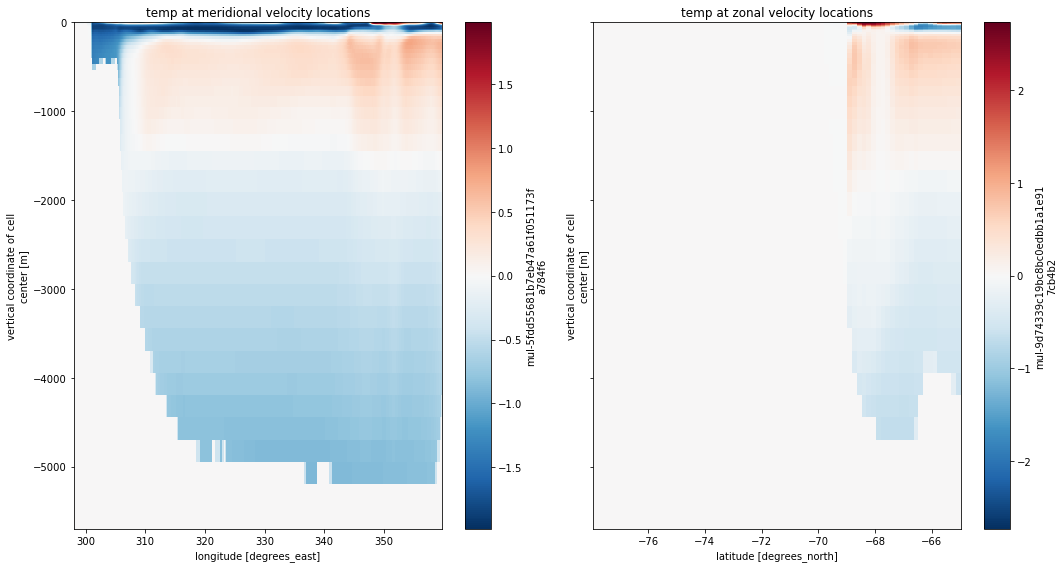

In [67]:
#plt.figure(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

theta_vvel[0].plot(ax=ax1)
#temperature values at vvel values in WG region in timestep:0
ax1.title.set_text('temp at meridional velocity locations')

theta_uvel[0].plot(ax=ax2)
#temperature values at uvel values in WG region in timestep:0
ax2.title.set_text('temp at zonal velocity locations')

plt.tight_layout();

In [69]:
uvel = dsr.UVEL.isel(**lat_range, XG=right_lon)
vvel = dsr.VVEL.isel(**lon_range, YG=upper_lat)

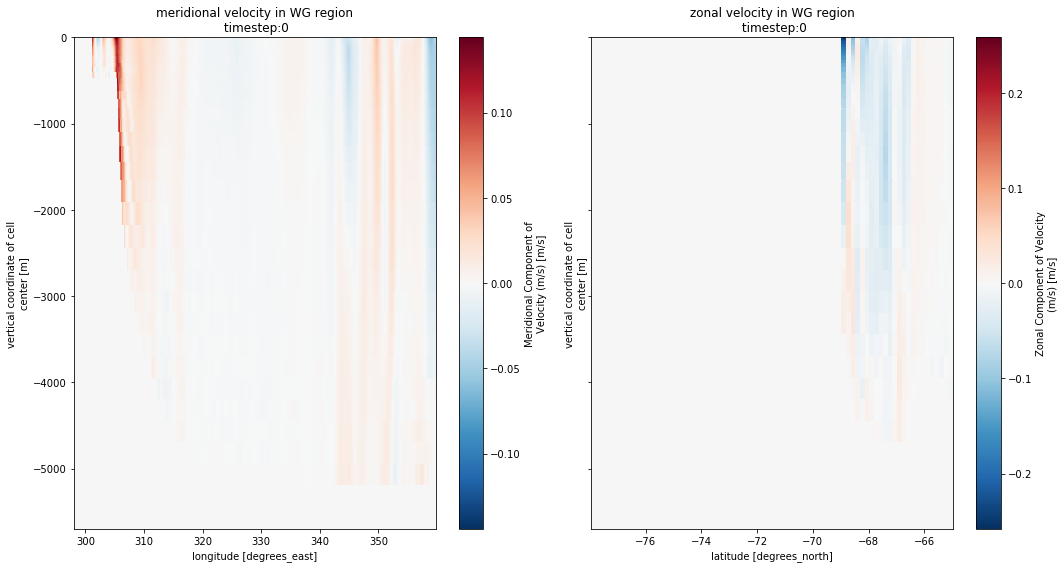

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

vvel[0].plot(ax=ax1)
#vvel values in WG region in timestep:0
ax1.title.set_text('meridional velocity in WG region\n timestep:0')

uvel[0].plot(ax=ax2)
#uvel values in WG region in timestep:0
ax2.title.set_text('zonal velocity in WG region\n timestep:0')

plt.tight_layout();

In [ ]:
#plt.figure(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

#temperature values at vvel values in WG region in timestep:0
ax1.title.set_text('temp at meridional velocity locations')

#temperature values at uvel values in WG region in timestep:0
ax2.title.set_text('temp at zonal velocity locations')

plt.tight_layout();

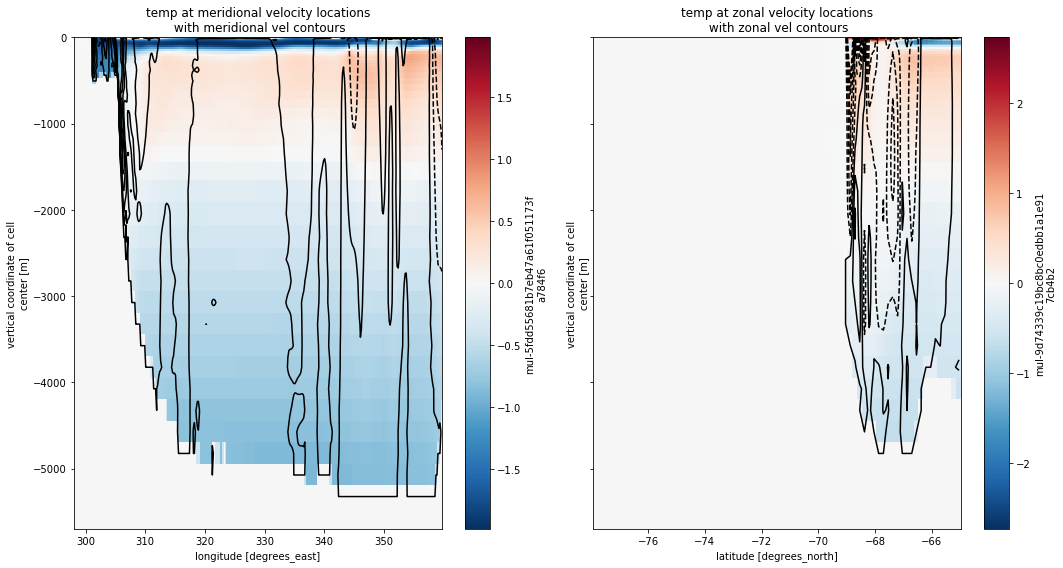

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), sharey=True)

theta_vvel[0].plot(ax=ax1)
#vvel[0].plot(ax=ax1)
vvel[0].plot.contour(ax=ax1, colors='k', levels=np.arange(-0.1, 0.1, 0.02))
ax1.title.set_text('temp at meridional velocity locations\n with meridional vel contours')

theta_uvel[0].plot(ax=ax2)
#uvel[0].plot(ax=ax2)
uvel[0].plot.contour(ax=ax2, colors='k', levels=np.arange(-0.1, 0.1, 0.02))
ax2.title.set_text('temp at zonal velocity locations\n with zonal vel contours')

plt.tight_layout();

In [27]:
vels = - (uvel + vvel).isel(**lat_range, **lon_range).sum(dim=['XC', 'YC', 'Z'])
vels

<xarray.DataArray (time: 438)>
dask.array<neg, shape=(438,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

In [37]:
vel_dist = histogram(dsr.THETA, bins=[theta_bins],
                     weights=vels, dim=['XC', 'YC', 'Z'])
vel_dist

<xarray.DataArray 'histogram_THETA' (time: 438, THETA_bin: 219)>
dask.array<getitem, shape=(438, 219), dtype=float64, chunksize=(1, 219), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * THETA_bin  (THETA_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 19.65 19.75 19.85

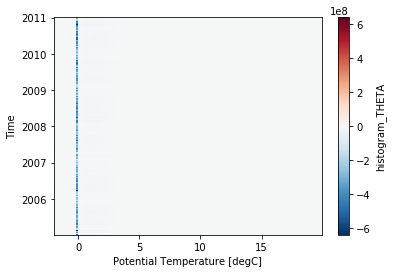

In [41]:
vel_dist.plot()

**ONLY WANT ON BOUNDARY...SO ONLY CARE ABOUT UPPER LAT AND RIGHT LON**

**If I aligned the grid cells to be individual points, does that change the value of the boundaries?**

In [50]:
vvel.isel(YC=upper_lat, XC=right_lon)

<xarray.DataArray 'sub-d9bea0a2d55b51beeaac02a03aad06eb' (time: 438, Z: 42)>
dask.array<getitem, shape=(438, 42), dtype=float32, chunksize=(1, 42), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
    YC       float32 -64.87497
    XC       float32 359.9167

In [53]:
uvel.isel(XC=right_lon)

<xarray.DataArray 'sub-0eb9c5e308d14fdb795429dbdd4e8513' (time: 438, Z: 42, YC: 320, XC: 2160)>
dask.array<sub, shape=(438, 42, 320, 2160), dtype=float32, chunksize=(1, 42, 320, 2159), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167

In [95]:
u_binned = histogram(theta_uvel.rename('theta'), bins=[theta_bins],
                     weights=u_transport_weddell, dim=['Z', 'YC'])
v_binned = histogram(theta_vvel.rename('theta'), bins=[theta_bins],
                     weights=v_transport_weddell, dim=['Z', 'XC'])

In [96]:
u_binned

<xarray.DataArray 'histogram_theta' (time: 438, theta_bin: 219)>
dask.array<getitem, shape=(438, 219), dtype=float64, chunksize=(1, 219), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * theta_bin  (theta_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 19.65 19.75 19.85

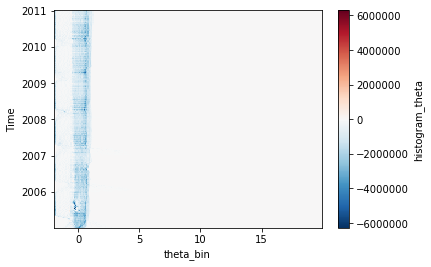

In [105]:
u_binned.plot()

In [110]:
transport_binned = u_binned + v_binned
transport_binned

<xarray.DataArray 'histogram_theta' (time: 438, theta_bin: 219)>
dask.array<add, shape=(438, 219), dtype=float64, chunksize=(1, 219), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * theta_bin  (theta_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 19.65 19.75 19.85

In [111]:
transport_binned.load()

<xarray.DataArray 'histogram_theta' (time: 438, theta_bin: 219)>
array([[ -56003.89136153,  134029.21499729,  463397.05109107, ...,
              0.        ,       0.        ,       0.        ],
       [ -59257.93840218,  171270.35318851,  747649.39157867, ...,
              0.        ,       0.        ,       0.        ],
       [   5524.04075241,  198272.78797197,  704379.24741833, ...,
              0.        ,       0.        ,       0.        ],
       ...,
       [ -13295.34173584, -261095.14835989,  405743.85684565, ...,
              0.        ,       0.        ,       0.        ],
       [ -13007.76053619, -381861.94876301,  251987.88573289, ...,
              0.        ,       0.        ,       0.        ],
       [   1229.26156616, -774553.15990424,  171924.24316216, ...,
              0.        ,       0.        ,       0.        ]])
Coordinates:
  * time       (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * theta_bin  (theta_bin) float64 -1.95 -1.85 -1.75 -1.65 ... 19.65 19.75 19.85

In [115]:
transport_binned.max()

<xarray.DataArray 'histogram_theta' ()>
array(8427457.15506244)

(-2000000.0, 2000000.0)

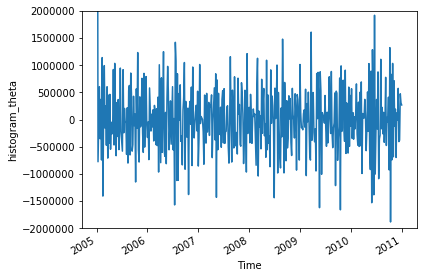

In [124]:
transport_binned.sum(dim='theta_bin').plot()
plt.ylim([-2e6, 2e6])

(-2, 2)

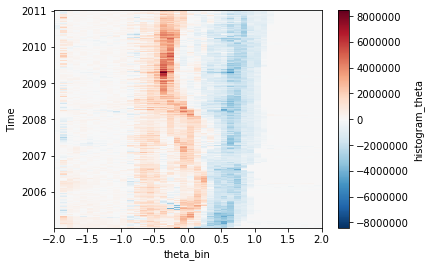

In [114]:
transport_binned.plot()
plt.xlim([-2, 2])

# $\Omega$

$$
-\int_R \delta(\tilde \theta - \theta) \dot \theta dV
$$